In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
irisDS=pd.read_csv('iris.csv')

In [3]:
irisDS.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
x=irisDS.drop('Species',axis=1)

In [5]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [6]:
y=irisDS['Species']

In [7]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [8]:
Y=[]
for i in y:
    if i=="Iris-setosa":
        Y.append(0)
    elif i=="Iris-virginica":
        Y.append(1)
    elif i=="Iris-versicolor":
        Y.append(0.5)

In [9]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [10]:
y.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [11]:
len(Y)

150

In [12]:
x.shape

(150, 5)

In [13]:
y.shape

(150,)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.365,random_state=20)

In [15]:
x_train.shape

(95, 5)

In [16]:
y_train.shape

(95,)

In [17]:
knn=KNeighborsClassifier(n_neighbors=5)

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
p=knn.predict(x_test)

In [20]:
print(confusion_matrix(y_test,p))

[[18  0  0]
 [ 0 19  0]
 [ 0  0 18]]


In [21]:
print(classification_report(y_test,p))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        55
      macro avg       1.00      1.00      1.00        55
   weighted avg       1.00      1.00      1.00        55



In [22]:
accuracy_score(y_test,p)

1.0

In [23]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(y_test !=pred))

Text(0, 0.5, 'Error rate')

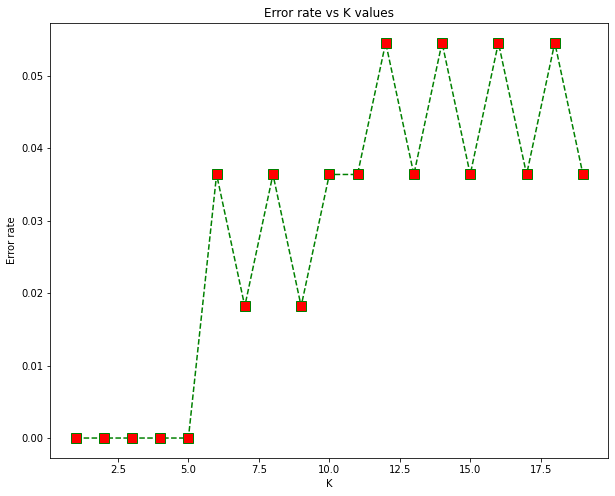

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,20),error_rate, color='green', linestyle='dashed',marker='s',markerfacecolor="red",markersize=10)
plt.title('Error rate vs K values')
plt.xlabel('K')
plt.ylabel('Error rate')

In [25]:
p

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Ir

In [26]:
y_test

47         Iris-setosa
73     Iris-versicolor
74     Iris-versicolor
129     Iris-virginica
67     Iris-versicolor
89     Iris-versicolor
143     Iris-virginica
21         Iris-setosa
108     Iris-virginica
12         Iris-setosa
147     Iris-virginica
76     Iris-versicolor
119     Iris-virginica
35         Iris-setosa
28         Iris-setosa
122     Iris-virginica
13         Iris-setosa
58     Iris-versicolor
114     Iris-virginica
57     Iris-versicolor
50     Iris-versicolor
149     Iris-virginica
111     Iris-virginica
20         Iris-setosa
72     Iris-versicolor
81     Iris-versicolor
98     Iris-versicolor
34         Iris-setosa
104     Iris-virginica
133     Iris-virginica
95     Iris-versicolor
88     Iris-versicolor
0          Iris-setosa
46         Iris-setosa
11         Iris-setosa
106     Iris-virginica
85     Iris-versicolor
1          Iris-setosa
51     Iris-versicolor
130     Iris-virginica
55     Iris-versicolor
134     Iris-virginica
37         Iris-setosa
65     Iris

In [27]:
ac = []
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p=knn.predict(x_test)
    ac.append(accuracy_score(y_test,p))

In [28]:
ac

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9636363636363636,
 0.9818181818181818,
 0.9636363636363636,
 0.9818181818181818,
 0.9636363636363636,
 0.9636363636363636,
 0.9454545454545454,
 0.9636363636363636,
 0.9454545454545454,
 0.9636363636363636,
 0.9454545454545454,
 0.9636363636363636,
 0.9454545454545454,
 0.9636363636363636]

In [29]:
h=max(ac)
h

1.0

In [30]:
for i in range(0,len(ac)):
    if h==ac[i]:
        print(i+1)

1
2
3
4
5
